In [5]:
import seaborn as sns;
import pandas as pd;
from sklearn.neighbors import KNeighborsClassifier as KNN

sns.set

# charger le dataset
wine = pd.read_csv(r"/content/winequality-white.csv", sep=';')
wine_df = wine

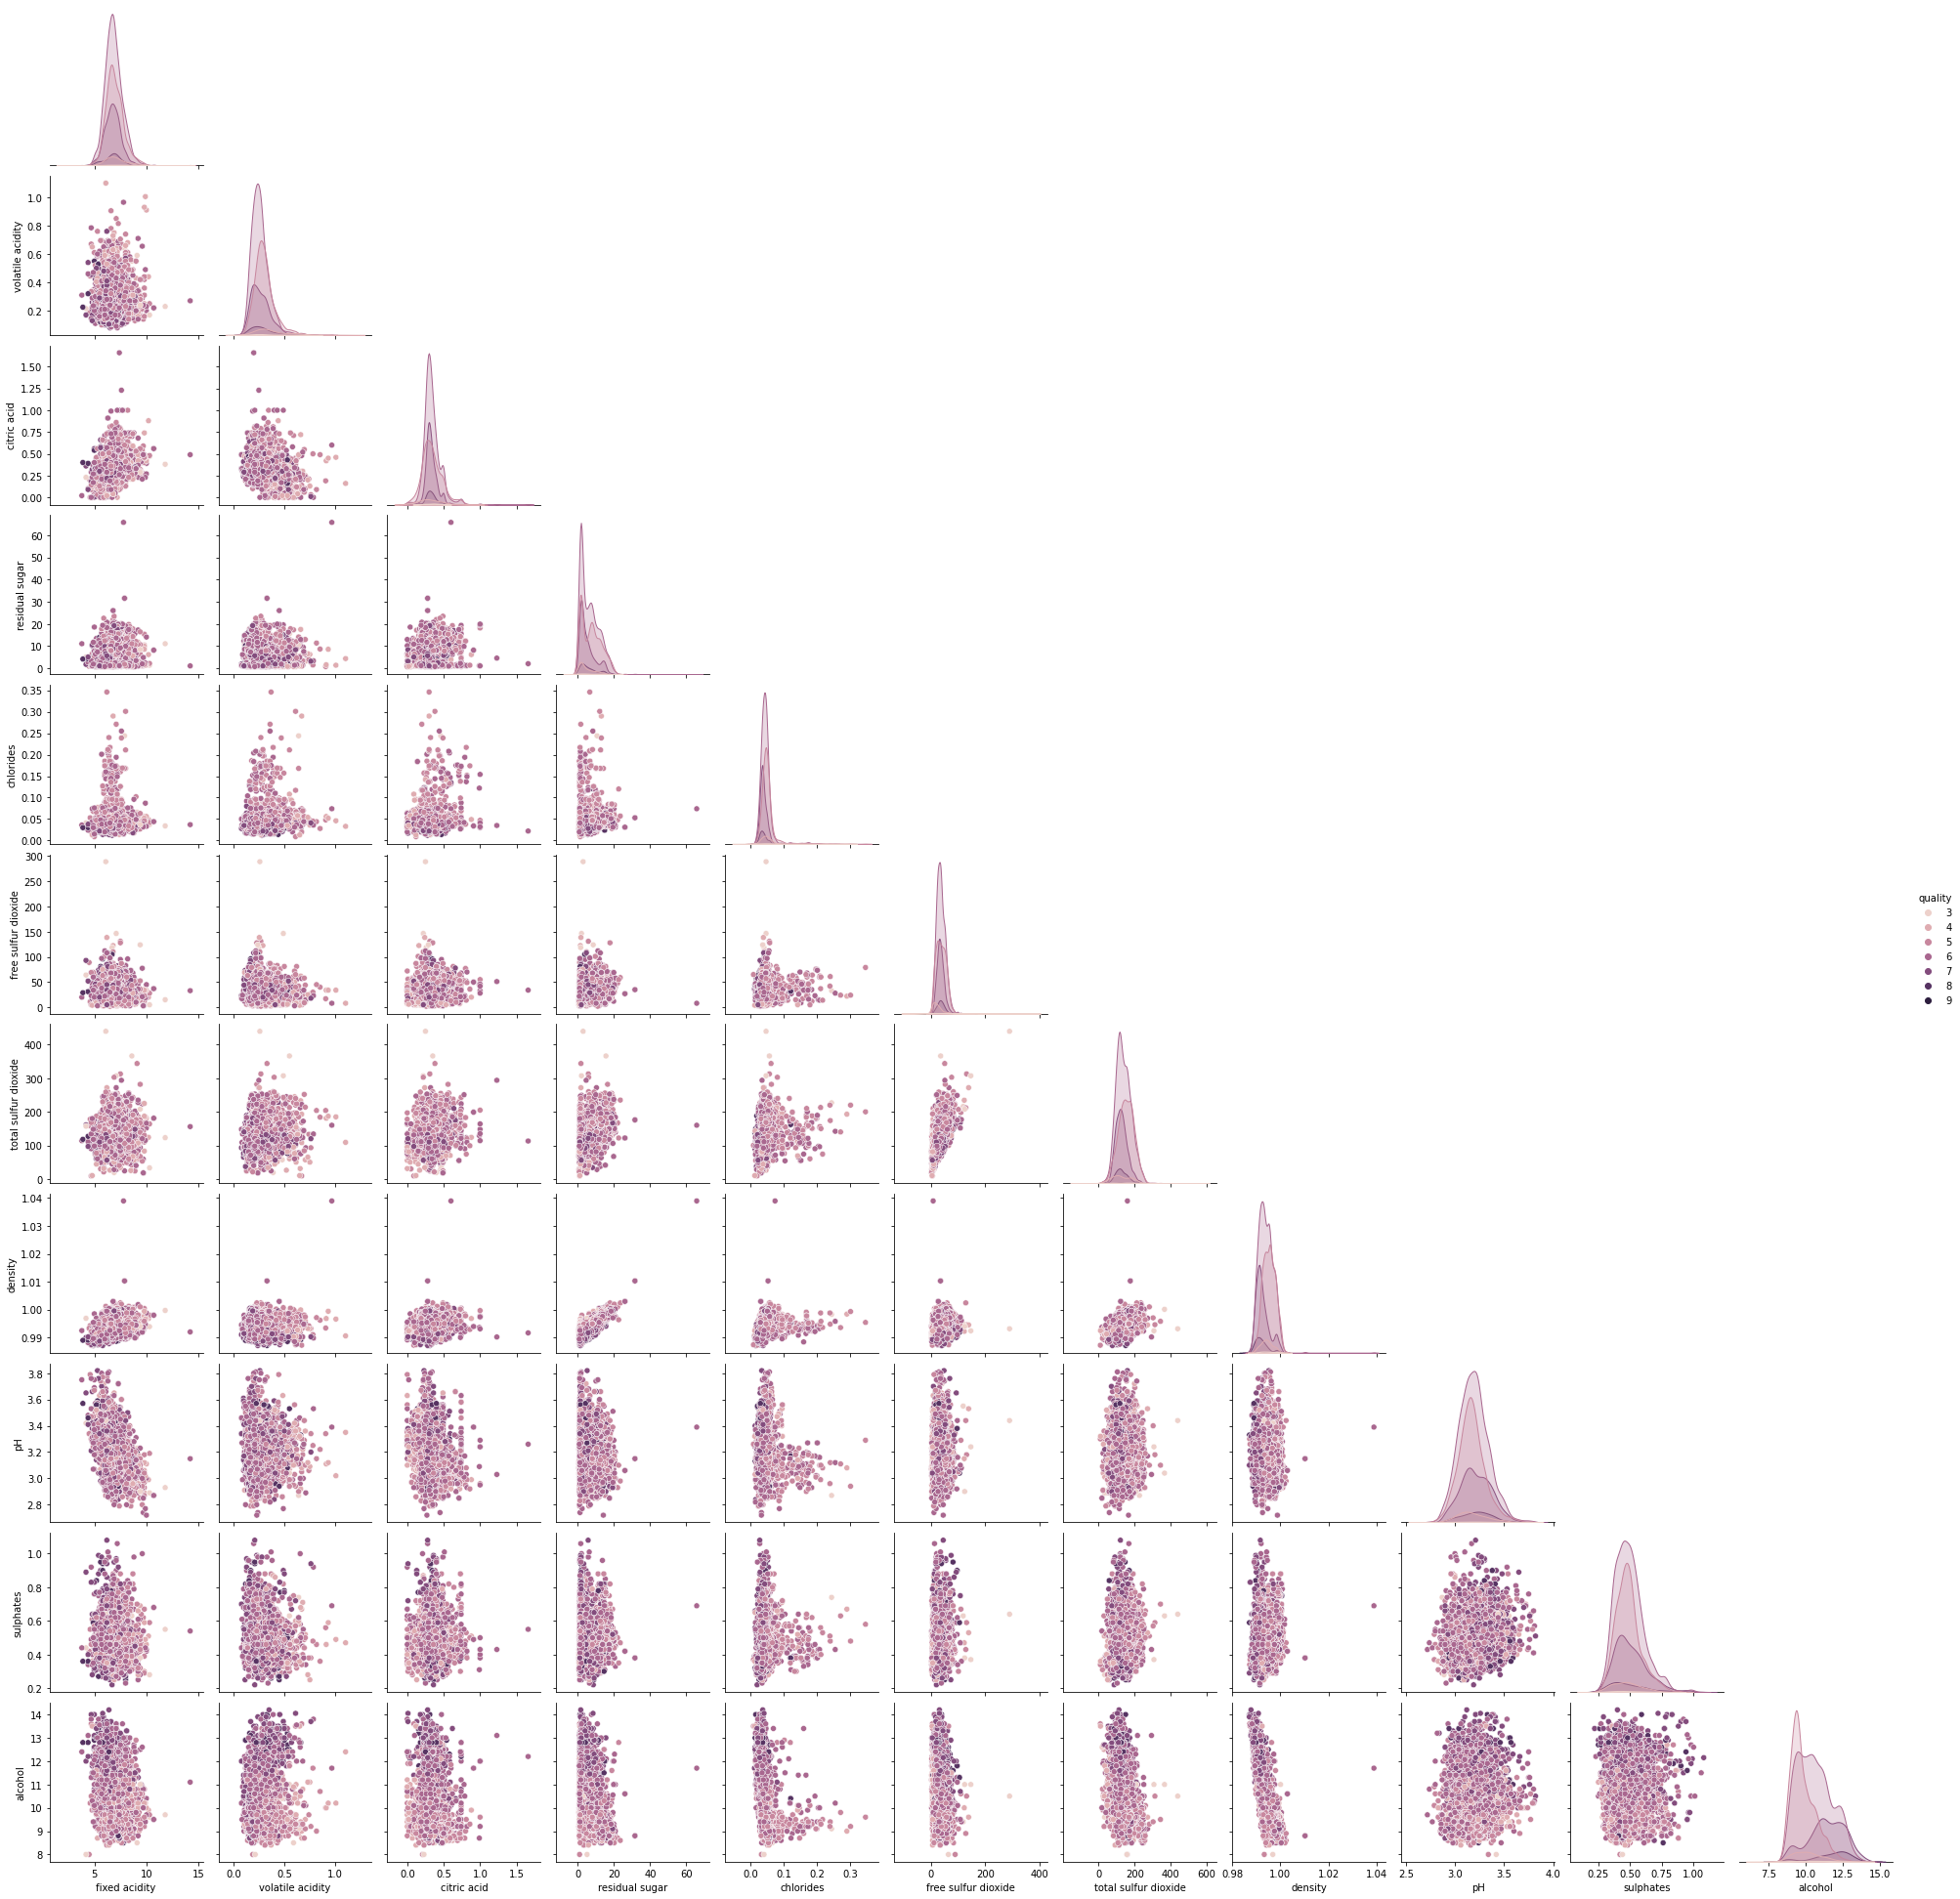

In [21]:
wine_df = wine
sns.pairplot(wine_df, hue="quality", diag_kind="kde", corner = True)


In [7]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [8]:
Y = wine_df['quality'].astype('category').cat.codes
Y

0       3
1       3
2       3
3       3
4       3
       ..
4893    3
4894    2
4895    3
4896    4
4897    3
Length: 4898, dtype: int8

In [9]:
X = wine_df.drop(['quality'], axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
splits = train_test_split(X,Y,
                          test_size=0.20,
                          random_state=0)

for each in splits:
  print(each.shape)
X_train, X_test, Y_train, Y_test = splits
scaler = StandardScaler()

(3918, 11)
(980, 11)
(3918,)
(980,)


In [11]:
def accuracy(preds, Y):
  return ((preds == Y).sum() / len(Y)* 100)

# **KNN méthode**

In [12]:
def trainingKNN (n_neighbors):
  knn = KNN(n_neighbors=n_neighbors)
  knn.fit(X_train,Y_train)
  prediction = knn.predict(X_test)
  print(prediction.shape)
  print(prediction)
  print('L\'algorithme KNeighborsClassifier avec n_neighbors =' , n_neighbors , 'est précis à ', accuracy(prediction,Y_test), '%')
  return prediction

In [14]:
prediction = trainingKNN(5)

(980,)
[2 2 3 3 2 2 3 3 3 3 3 4 2 3 3 3 2 2 4 3 3 4 2 2 2 4 2 3 3 3 4 2 3 3 2 3 2
 4 4 3 3 2 3 3 3 3 3 3 4 3 4 4 2 3 3 4 2 3 3 3 2 2 3 3 3 4 2 3 2 2 4 3 2 3
 3 2 3 2 3 4 2 3 2 2 2 1 3 4 2 3 3 3 2 4 2 2 4 3 2 3 4 2 3 3 2 2 3 3 3 3 2
 2 4 2 2 4 3 3 4 2 2 3 2 2 3 3 2 3 3 3 3 3 3 4 3 2 2 4 2 2 3 2 3 2 2 3 2 4
 3 3 4 3 3 3 3 4 4 3 2 4 2 3 4 3 2 3 3 3 2 2 4 3 2 2 4 2 4 3 3 3 3 3 3 3 3
 2 3 3 2 3 3 3 2 4 3 3 3 3 3 2 3 3 1 3 3 3 3 2 3 3 3 5 4 2 3 5 3 3 3 4 2 3
 3 3 3 2 4 1 3 2 2 3 2 2 2 3 1 4 2 3 2 2 3 3 3 4 2 1 4 2 3 4 2 3 3 2 2 3 4
 3 4 3 3 3 3 3 3 3 3 2 3 2 3 2 3 2 4 3 2 3 3 2 2 4 3 3 3 3 3 3 3 3 2 2 2 2
 3 3 3 4 2 3 3 2 3 3 2 3 3 2 2 2 2 4 2 2 3 2 3 3 2 3 2 2 2 2 3 3 2 4 3 3 3
 2 3 3 3 2 3 2 3 4 3 4 4 3 2 5 4 3 3 4 2 4 4 2 2 3 2 4 2 2 4 2 4 3 2 3 2 2
 2 3 4 3 3 3 3 3 4 2 3 3 2 3 3 3 3 3 2 2 3 4 3 4 3 3 5 2 3 3 3 3 3 3 5 3 3
 3 3 3 2 3 3 3 4 3 3 3 3 3 5 3 4 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3
 3 4 3 4 4 3 2 3 2 2 2 3 3 3 3 2 3 2 4 3 2 2 4 3 2 3 2 2 2 2 3 3 2 2 2 3 2
 3 4 2 2 2 3 4 2 2

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[  0,   1,   6,   2,   0,   0],
       [  0,   3,  24,  20,   4,   0],
       [  0,   7, 135, 137,  16,   0],
       [  0,   4, 111, 250,  40,   4],
       [  0,   0,  37,  90,  54,   2],
       [  0,   0,   4,  19,   6,   4]])

# **SVC méthode**

In [23]:
from sklearn.svm import SVC

In [24]:
svc = SVC(gamma='auto')

def trainingSVC():
  svcTrained = svc.fit(X_train,Y_train)
  prediction = svcTrained.predict(X_test)
  print(prediction)
  print('L\'algorithme Support Vector Classification est précis à ', accuracy(prediction,Y_test), '%')
  return prediction

In [25]:
trainingSVC()

[3 3 3 3 2 3 3 3 3 3 3 4 2 3 3 3 2 2 4 3 3 4 2 4 3 4 2 3 4 3 3 2 3 3 2 3 4
 4 4 3 3 2 3 3 3 3 3 3 4 3 4 3 3 3 3 4 2 3 3 3 2 3 3 3 3 3 2 3 2 2 4 2 2 3
 3 2 4 2 2 3 2 3 3 2 2 3 3 3 2 3 3 3 3 5 2 2 4 2 2 3 3 2 4 3 2 3 3 3 3 3 3
 2 3 2 2 3 3 3 3 3 2 3 2 3 2 4 2 3 3 3 3 3 3 3 2 3 3 4 2 3 3 4 3 3 2 3 2 3
 3 3 4 3 3 4 2 3 2 3 2 3 3 3 3 4 2 3 3 3 2 2 4 3 2 2 4 3 2 3 3 2 3 3 3 3 3
 2 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 3 3 3 2 3 3 3 5 4 2 3 5 3 3 3 4 3 3
 3 3 3 2 3 3 3 2 3 3 3 2 2 3 3 3 2 3 2 2 3 3 3 4 2 2 3 3 3 4 3 3 3 2 2 3 4
 3 4 3 3 3 3 3 3 3 3 2 3 4 3 3 3 2 2 3 3 3 4 3 3 2 2 3 3 3 3 3 3 4 3 3 2 3
 3 3 3 4 3 3 3 3 3 3 2 3 3 2 3 3 3 4 2 2 3 2 3 3 2 3 2 3 3 2 3 3 2 3 2 3 3
 2 3 3 3 2 3 2 3 4 3 4 4 3 2 3 3 3 4 3 3 3 4 2 3 3 2 4 3 3 4 3 4 3 3 3 2 3
 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 2 3 4 3 4 3 3 5 3 3 3 3 3 3 3 2 3 2
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 4 3 3 2 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 2 3
 3 4 3 3 4 3 3 3 3 2 2 3 3 3 3 2 3 2 3 3 2 3 3 3 2 3 2 3 2 2 3 3 3 2 2 3 2
 3 4 2 3 2 3 3 2 3 4 2 4 

array([3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 2, 2, 4, 3, 3, 4,
       2, 4, 3, 4, 2, 3, 4, 3, 3, 2, 3, 3, 2, 3, 4, 4, 4, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 2, 2, 4, 2, 2, 3, 3, 2, 4, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3,
       2, 3, 3, 3, 3, 5, 2, 2, 4, 2, 2, 3, 3, 2, 4, 3, 2, 3, 3, 3, 3, 3,
       3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 2, 4, 2, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 2, 3, 3, 3, 4, 3, 3, 4,
       2, 3, 2, 3, 2, 3, 3, 3, 3, 4, 2, 3, 3, 3, 2, 2, 4, 3, 2, 2, 4, 3,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 5, 4, 2, 3, 5, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2,
       3, 3, 3, 4, 2, 2, 3, 3, 3, 4, 3, 3, 3, 2, 2, 3, 4, 3, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3, 3, 3, 4, 3, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 2, 3, 3, 3, 3, 4, 3,

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[  0,   1,   6,   2,   0,   0],
       [  0,   3,  24,  20,   4,   0],
       [  0,   7, 135, 137,  16,   0],
       [  0,   4, 111, 250,  40,   4],
       [  0,   0,  37,  90,  54,   2],
       [  0,   0,   4,  19,   6,   4]])

# **Méthode Regression logistique**

In [27]:
from sklearn.linear_model import LogisticRegression as LG

In [28]:
lg = LG()

def trainingLG():
  lg = LG()
  lgTrained = lg.fit(X_train,Y_train)
  prediction = lgTrained.predict(X_test)
  acc = accuracy(prediction,Y_test)
  print(prediction)
  print('L\'algorithme Support Vector Classification est précis à ', acc, '%')


In [29]:
trainingLG()

[2 3 3 3 3 2 3 3 3 3 3 2 3 2 3 3 3 3 4 3 3 3 3 3 3 3 2 2 3 3 2 3 3 3 2 3 3
 2 3 3 3 3 2 3 2 3 3 3 3 3 3 3 2 3 3 3 3 3 2 3 3 3 3 3 4 3 3 3 2 3 3 2 3 3
 3 3 3 2 3 3 2 3 1 3 3 3 3 3 2 3 3 3 3 3 3 3 2 2 2 2 3 2 3 3 3 3 3 3 3 3 2
 3 3 2 3 3 2 2 3 3 3 3 3 2 3 4 3 3 2 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 4 3 3
 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 3 3 2 3 3 3 2 3 3 3 3
 3 3 2 2 3 3 3 2 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 2 2 3 3 3 3 3 3 3 2 3 3 3
 3 3 3 3 3 3 3 3 2 2 2 3 2 3 3 2 2 4 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 4 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 2 3 2 3 3 3 3 2 2 3 3 3 2 3 3 3 3 2
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 4 3 3 3 3 3 3 3 2 3 3 2 2 3 3 3 2 4 2 3 3 3 2
 2 3 4 3 3 3 3 3 3 2 3 3 2 2 2 2 3 3 2 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 2 3 2
 3 2 3 3 2 3 3 3 3 2 3 3 3 3 2 3 3 3 3 2 3 2 3 2 3 2 2 3 3 3 3 3 2 3 3 2 3
 3 4 3 3 3 3 3 3 3 3 1 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3
 3 4 3 3 2 3 3 2 3 2 3 3 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,prediction)

array([[  0,   1,   6,   2,   0,   0],
       [  0,   3,  24,  20,   4,   0],
       [  0,   7, 135, 137,  16,   0],
       [  0,   4, 111, 250,  40,   4],
       [  0,   0,  37,  90,  54,   2],
       [  0,   0,   4,  19,   6,   4]])

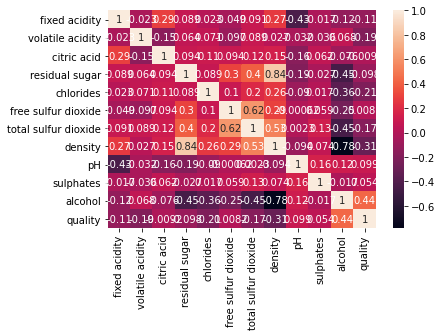

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
wine_df = wine_df.corr()

sns.heatmap(wine_df, 
        xticklabels=wine_df.columns,
        yticklabels=wine_df.columns,
        annot=True)